## Structural analysis of chimeras

We have seen how to find fragments from the Fuzzle database and build chimeras with them. We have also evaluated their potential energy with several energy scoring functions. Now we are going to have a look at the structures of these chimeras in depth.

First import the protlego module.

In [4]:
from protlego.all import *

Fetch for example by the HitID from the Fuzzle-database, as explained in detail in the "Fetching from the Fuzzle database" section. We can have a look at the chimeras that we built in tutorial 3.

In [5]:
myhit= fetch_id('4413706')

Let's build all possible chimera-combinations from query and subject, as explained in detail in the "Building chimeras" section. The chimeras will be stored as a dictionary in the variable chimeras:

In [8]:
a=Builder(myhit)
aln=a.get_alignment(myhit.query,myhit.no)
qPDB, sPDB = a.superimpose_structures(aln,partial_alignment=True)
chimeras=a.build_chimeras(partial_alignment=True)

2020-10-12 15:49:46,155 - protlego - INFO - Attempting to download domain d2dfda1 from the SCOP server
2020-10-12 15:49:47,510 - protlego - INFO - File downloaded as /tmp/tmpc55d_xpa.pdb
2020-10-12 15:49:47,511 - protlego - INFO - Attempting to download domain d1wa5a_ from the SCOP server
2020-10-12 15:49:49,156 - protlego - INFO - File downloaded as /tmp/tmpbnqv9qmo.pdb
2020-10-12 15:49:49,157 - protlego - INFO - Loading /tmp/tmpc55d_xpa.pdb as a chimera object
2020-10-12 15:49:49,239 - moleculekit.molecule - WARNING - Alternative atom locations detected. Only altloc A was kept. If you prefer to keep all use the keepaltloc="all" option when reading the file.
2020-10-12 15:49:49,241 - protlego - INFO - Loading /tmp/tmpbnqv9qmo.pdb as a chimera object
2020-10-12 15:49:49,302 - protlego - INFO - Attempting to download hhs file for d2dfda1 from the FUZZLE server
2020-10-12 15:49:49,435 - protlego - INFO - File downloaded as /tmp/tmpnxx_3e1q.hhs
2020-10-12 15:49:50,463 - protlego - INFO - 

### 1. Hydrophobic cluster analysis

The side chains of isoleucine, leucine, and valine (ILV) residues often form large hydrophobic clusters that very effectively impede the penetration of water to their underlying hydrogen bond networks. These ILV clusters serve as cores of stability in high‐energy partially folded states. For more information, see this publication: https://onlinelibrary.wiley.com/doi/full/10.1002/pro.2860
To compute hydrophobic clusters for a chimera object, we use the compute_hydrophobic_clusters() function. The ouput will be for each computed cluster:

* the cluster index,
* the residues involved in the cluster formation,
* the total area,
* the number of contacts,
* the contacts per residues, and
* the area per residue.

The output can be stored in a variable to print it out for example write it into a file.

In [11]:
clusters= chimeras['comb1_72'].compute_hydrophobic_clusters()

2020-10-12 15:53:00,434 - protlego - INFO - Initializing final output
2020-10-12 15:53:00,438 - protlego - INFO - Computing clusters
2020-10-12 15:53:03,739 - hydrophobic_clusters - INFO - Cluster index 1:Residues 17. Total area 2120.7734167837134 A^2. Number of contacts: 52. Contacts / Residue: 3.0588235294117645. Area / Residue 40.784104168917565
2020-10-12 15:53:03,742 - hydrophobic_clusters - INFO - Cluster index 2:Residues 12. Total area 1748.6573579708954 A^2. Number of contacts: 35. Contacts / Residue: 2.9166666666666665. Area / Residue 49.96163879916844
2020-10-12 15:53:03,746 - hydrophobic_clusters - INFO - Cluster index 4:Residues 3. Total area 104.60916007126269 A^2. Number of contacts: 4. Contacts / Residue: 1.3333333333333333. Area / Residue 26.152290017815673
2020-10-12 15:53:03,749 - hydrophobic_clusters - INFO - Cluster index 8:Residues 2. Total area 27.260437899926508 A^2. Number of contacts: 2. Contacts / Residue: 1.0. Area / Residue 13.630218949963254
2020-10-12 15:5

In [12]:
print(clusters[0])

Cluster(area=2120.7734167837134, residues=[3, 5, 12, 16, 18, 20, 26, 29, 31, 40, 44, 47, 53, 79, 110, 141, 156], contacts=52, ratio_contacts_residue=3.0588235294117645, ratio_area_residue=40.784104168917565)


In [13]:
print(clusters[0].area)
print(clusters[0].residues)
print(clusters[0].contacts)
print(clusters[0].ratio_contacts_residue)
print(clusters[0].ratio_area_residue)

2120.77341678
[3, 5, 12, 16, 18, 20, 26, 29, 31, 40, 44, 47, 53, 79, 110, 141, 156]
52
3.0588235294117645
40.7841041689


With the view function one can visualize the clusters using vmd. They are displayed with VDW-spheres in different colors.

In [14]:
chimeras['comb1_72'].view()

There is also the possibility to change the selection for computing the clusters.The default selection are the hydrophobic residues Valine, Leucine and Isoleucine. For example, we can add PHE to the selection.

In [15]:
chimeras['comb1_72'].compute_hydrophobic_clusters(sel='protein and noh and not backbone and resname PHE LEU VAL ILE')
chimeras['comb1_72'].view()

2020-10-12 15:53:29,968 - protlego - INFO - Initializing final output
2020-10-12 15:53:29,972 - protlego - INFO - Computing clusters
2020-10-12 15:53:34,019 - hydrophobic_clusters - INFO - Cluster index 1:Residues 25. Total area 4122.088491875879 A^2. Number of contacts: 74. Contacts / Residue: 2.96. Area / Residue 55.703898538863236
2020-10-12 15:53:34,024 - hydrophobic_clusters - INFO - Cluster index 2:Residues 18. Total area 2627.861887637631 A^2. Number of contacts: 54. Contacts / Residue: 3.0. Area / Residue 48.6641090303265


Instead of chimeras, one could also work with a standard pdb, by initializing it as a chimera object. 

### 2. Salt bridges analysis


A salt bridge is a combination of two non-covalent interactions: hydrogen bonding and ionic bonding. Ion pairing is one of the most important noncovalent forces in biological systems and it contributes to the stability to the entropically unfavorable folded conformation of proteins.

To compute the salt bridges for a chimera object use the compute_salt_bridges() function.

Use the view() function to visualize the salt bridges they will be displayed in Licorice. The positively charged residues are displayed in blue and the negatively charged residue are displayed in red. As before, one can also work with a pdb initialized as a chimera object.

In [17]:
chimera=chimeras['comb1_72']
chimera.compute_salt_bridges()
chimera.view()

563 823
1041 873
1265 1196


### 3. Hydrogen Network analysis

A hydrogen bond (H-bond) is a primarily electrostatic force of attraction between a hydrogen (H) atom which is covalently bound to a more electronegative atom (called the donor) and another electronegative atom bearing a lone pair of electrons—the hydrogen bond acceptor (called the acceptor)

To compute the hydrogen networks for a chimera object use the compute_hydrogen_networks() function. With the sidechain_only argument it is possible to compute hydrogen networks not only between the sidechains, which is the default.

Use the view() function to visualize the hydrogen bonds they are displayed in licorice. They are represented in different colors when they belong to the same hydrogen bond network. Again one can also work with a pdb initialized as a chimera object.

In [2]:
chimera.compute_hydrogen_networks()
chimera.view()

2020-01-21 12:25:16,046 - propka - INFO - No pdbfile provided
/agh/projects/noelia/miniconda3/envs/my-rdkit-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


### 4. Further structural analysis

#### 4.1 Calculate solvent accessible surface area

The solvent-accessible surface area (SASA) is the surface area of a biomolecule that is accessible to a solvent. The function calc_sasa() calculates for a chimera object the solvent accessible surface area. By default, the function computes the total SASA, but it is also possible to calculate the polar or apolar surface area with the parameter sasa_type="polar", sasa_type="apolar".


In [18]:
total=calc_sasa(chimera=chimeras['comb1_72'])
polar=calc_sasa(chimera=chimeras['comb1_72'] ,sasa_type="polar")
apolar=calc_sasa(chimera=chimeras['comb1_72'] ,sasa_type="apolar")

2020-10-12 16:04:08,365 - protlego - INFO - Area is 87.79385375976562 (nm)^2
2020-10-12 16:04:08,526 - protlego - INFO - Area is 60.05790710449219 (nm)^2
2020-10-12 16:04:08,699 - protlego - INFO - Area is 27.735942840576172 (nm)^2


#### 4.2 Secondary structure for every residue

To calculate the secondary structure for every residue in a pdb or a chimera object we can use the function calc_dssp(). The output will be an array containg a one letter code for the secondary structure for each residue. 

- C:  Coil
- H:  Helix
- E:  Sheet

In [19]:
calc_dssp(chimera=chimeras['comb1_72'])

array([['C', 'E', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'C',
        'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'H', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'C', 'C', 'C',
        'E', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'H', 'H', 'H',
        'H', 'H', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
        'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'C', 'H', 'H', 'H', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'C', 'C', 'E',
        'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
        'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'C',
        'C', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
        'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
        'C', 'C', 'C', 'C', 'C', 'C', 'C']],
      dtype='<U2')

If the parameter simplified is set to false. The code expandes:

- H: 	Alpha helix
- B:	Isolated beta-bridge residue
- E: 	Strand
- G: 	3-10 helix
- I: 	Pi helix
- T: 	Turn
- S: 	Bend
- ' ':      None

In [21]:
calc_dssp(chimera=chimeras['comb1_72'], simplified=False)

array([[' ', 'E', 'E', 'E', 'E', 'E', 'E', 'T', 'T', 'T', 'S', 'T', 'T',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', ' ', 'T', 'T',
        'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'H', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'S', 'S', 'S', 'S', ' ',
        'E', 'E', 'E', 'E', 'E', 'E', 'S', 'T', 'T', 'T', 'H', 'H', 'H',
        'H', 'H', 'T', 'T', ' ', ' ', 'E', 'E', 'E', 'E', 'E', 'E', 'E',
        'T', 'T', ' ', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'H',
        'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'S', 'S', ' ', ' ', 'E',
        'E', 'E', 'E', 'E', 'E', ' ', 'T', 'T', 'S', 'S', ' ', ' ', 'S',
        'S', ' ', 'T', 'T', 'T', ' ', ' ', 'H', 'H', 'H', 'H', 'H', 'T',
        ' ', 'E', 'E', 'E', 'E', ' ', ' ', 'T', 'T', 'T', ' ', 'T', 'T',
        'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
        'T', ' ', 'T', 'T', ' ', ' ', ' ']],
      dtype='<U2')

#### 4.3 Calculating distance matrices 

The function calc_dist_matrix calculates a distance matrix for a chimera object or a pdb file. The selection can be defined, default selection is by residue but selection can be also alpha for taking only the C alpha atoms into account. Also the type can be defined default is contacts for calculating only a contact map, but the parameter type can be also set to distances to draw a distance matrix. The parameter plot can be set to true to draw a plot.

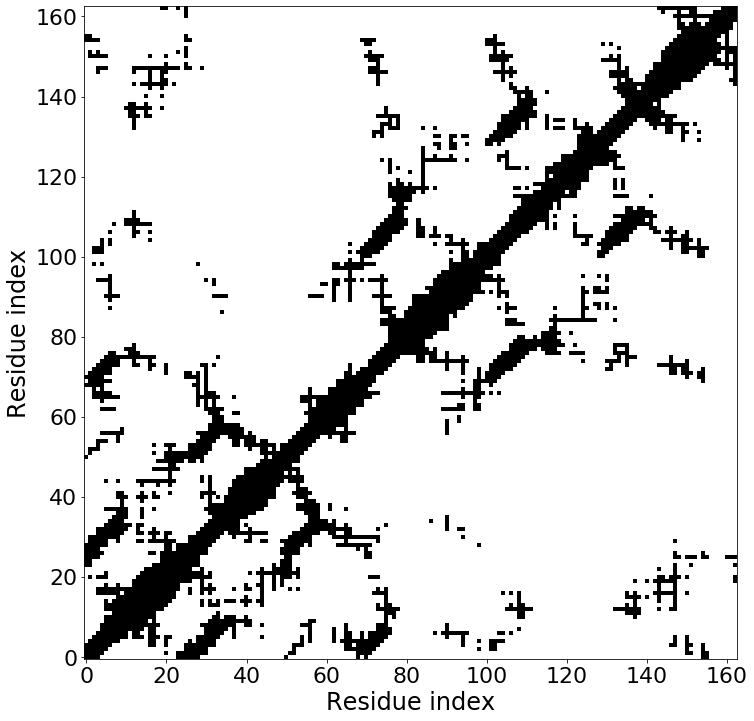

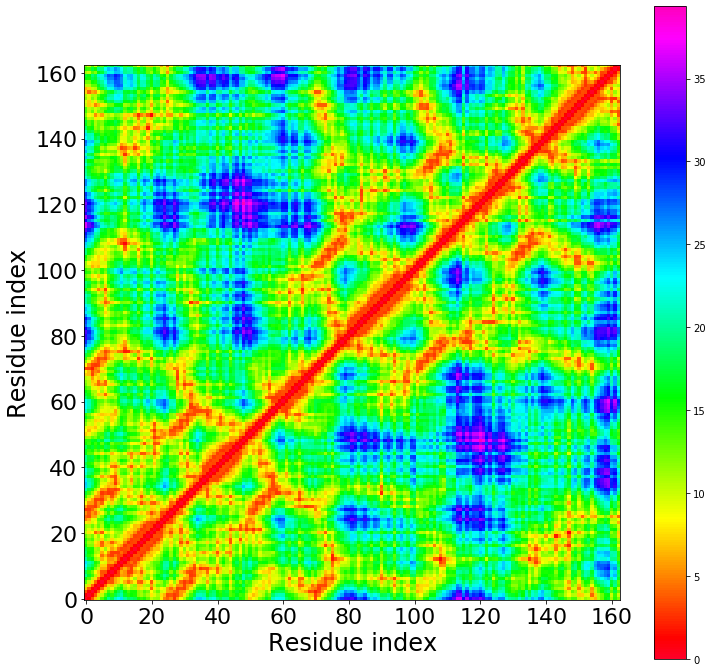

In [22]:
contact_map=calc_dist_matrix(chimera=chimeras['comb1_72'], plot=True)
distance_matrix=calc_dist_matrix(chimera=chimeras['comb1_72'],type='distances', plot=True)

#### 4.4 Calculating contact orders

The function calc_contact_order can be used to calculate the contact order of a protein. It is a measure of the locality of the inter-amino acid contacts in the native folded state. It is computed as the average sequence distance between residues that form contacts below a threshold in the folded protein divided by the total length of the protein. The function can calculate the contact order of a chimera object or a pdb file  and the distance cutoff can be set, the default distance cutoff is 8 Ångström. The output is the contact order.

In [23]:
calc_contact_order(chimera=chimeras['comb1_72'])

Contact order is 16.048235723913784 %


16.048235723913784